## Dev env configuration

In [1]:
# install the required python packages
# !pip install numpy pandas yfinance matplotlib mplfinance seaborn

## Imports

In [2]:
# import the necessary packages
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf
import pandas as pd

## Market data helper method

In [3]:
def fetch_ohlcv_history(
        ticker: str,
        start_date: datetime,
        end_date: datetime,
        interval: str
) -> pd.DataFrame:
    # download the OHLCV market data for the ticker
    df = yf.download(
        tickers=ticker,
        start=start_date,
        end=end_date,
        interval=interval,
        auto_adjust=True,
        progress=False
    )
    
    # restructure the default multi-index dataframe to our preferred format
    df = df.stack(level="Ticker", future_stack=True)
    df.index.names = ["Date", "Symbol"]
    df = df[["Open", "High", "Low", "Close", "Volume"]]
    df = df.swaplevel(0, 1)
    df = df.sort_index()

    # return the dataframe
    return df

## Configuring our date range and ticker

In [4]:
# set the name of the ticker we want to download market data for along with
# the end date for our OHLCV history requests
ticker = "AAPL"
end_date = datetime(year=2025, month=3, day=1)

## Computing daily 50 and 200 moving averages

In [5]:
# fetch daily market data for the ticker
df_daily = fetch_ohlcv_history(
    ticker=ticker,
    start_date=end_date - timedelta(days=365 * 2),
    end_date=end_date,
    interval="1d"
)
df_daily

Price                    Open        High         Low       Close    Volume
Symbol Date                                                                
AAPL   2023-03-02  142.938524  145.245263  142.463305  144.453247  52238100
       2023-03-03  146.561942  149.601298  145.859039  149.522095  70732300
       2023-03-06  152.254550  154.739500  151.927858  152.294159  87558000
       2023-03-07  152.165450  152.492157  149.621117  150.086426  56182000
       2023-03-08  151.284351  151.937766  150.314140  151.343750  47204800
...                       ...         ...         ...         ...       ...
       2025-02-24  244.929993  248.860001  244.419998  247.100006  51326400
       2025-02-25  248.000000  250.000000  244.910004  247.039993  48013300
       2025-02-26  244.330002  244.979996  239.130005  240.360001  44433600
       2025-02-27  239.410004  242.460007  237.059998  237.300003  41153600
       2025-02-28  236.949997  242.089996  230.199997  241.839996  56796200

[501 rows x 5 columns]

In [6]:
# compute the daily 50MA
df_daily["50MA"] = df_daily.groupby(level="Symbol")["Close"].transform(
    lambda x: x.rolling(window=50).mean()
)

# compute the daily 200MA
df_daily["200MA"] = df_daily.groupby(level="Symbol")["Close"].transform(
    lambda x: x.rolling(window=200).mean()
)

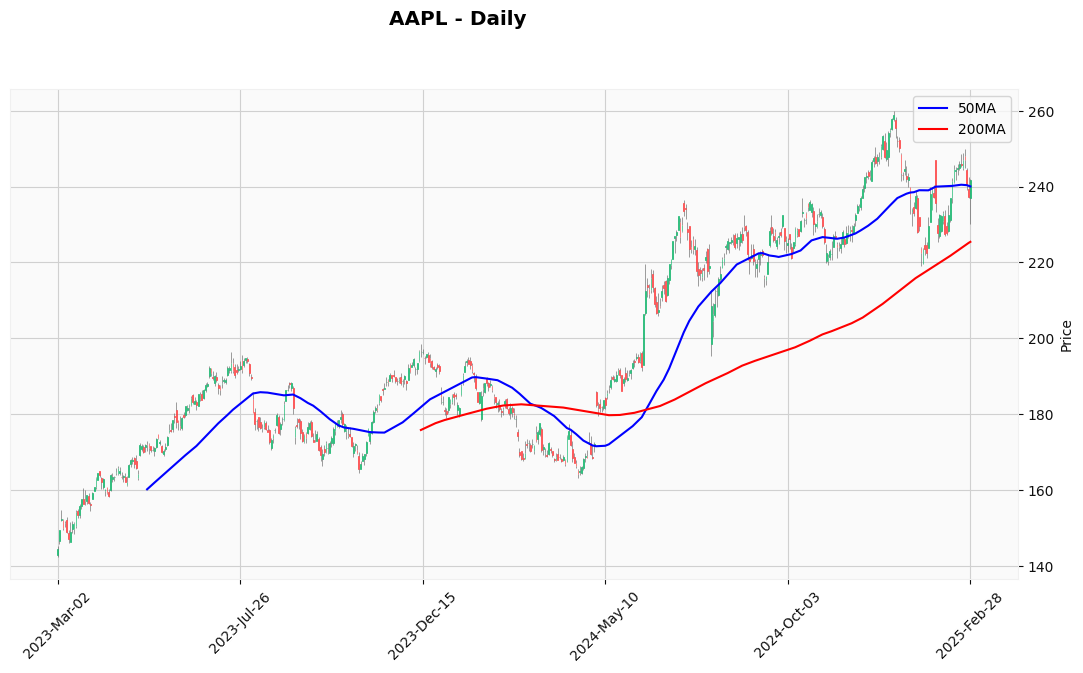

In [7]:
# grab the sub-dataframe for the ticker
df = df_daily.xs(ticker)

# construct additional plots for the MAs
addt_plots = [
    mpf.make_addplot(df["50MA"], color="blue", width=1.5, label="50MA"),
    mpf.make_addplot(df["200MA"], color="red", width=1.5, label="200MA"),
]

# plot the daily OHLCV and MAs
mpf.plot(
    df,
    type="candle",
    style="yahoo",
    addplot=addt_plots,
    figsize=(14, 7),
    title=f"{ticker} - Daily"
)

## Computing weekly 10 and 40 moving averages

In [8]:
# fetch weekly market data for the ticker
df_weekly = fetch_ohlcv_history(
    ticker=ticker,
    start_date=end_date - timedelta(days=365 * 3),
    end_date=end_date,
    interval="1wk"
)
df_weekly.tail()

Price                    Open        High         Low       Close     Volume
Symbol Date                                                                 
AAPL   2025-01-27  223.773975  246.918527  223.734011  235.740814  372790500
       2025-02-03  229.737414  233.743004  225.452117  227.380005  227383400
       2025-02-10  229.317883  245.280329  226.950475  244.331375  226587600
       2025-02-17  244.149994  248.690002  241.839996  245.550003  166541000
       2025-02-24  244.929993  250.000000  230.199997  241.839996  241723100

In [9]:
# compute the weekly 10MA
df_weekly["10MA"] = df_weekly.groupby(level="Symbol")["Close"].transform(
    lambda x: x.rolling(window=10).mean()
)

# compute the weekly 40MA
df_weekly["40MA"] = df_weekly.groupby(level="Symbol")["Close"].transform(
    lambda x: x.rolling(window=40).mean()
)
df_weekly.tail()

Price                    Open        High         Low       Close     Volume  \
Symbol Date                                                                    
AAPL   2025-01-27  223.773975  246.918527  223.734011  235.740814  372790500   
       2025-02-03  229.737414  233.743004  225.452117  227.380005  227383400   
       2025-02-10  229.317883  245.280329  226.950475  244.331375  226587600   
       2025-02-17  244.149994  248.690002  241.839996  245.550003  166541000   
       2025-02-24  244.929993  250.000000  230.199997  241.839996  241723100   

Price                    10MA        40MA  
Symbol Date                                
AAPL   2025-01-27  240.470609  222.363761  
       2025-02-03  239.501674  223.485307  
       2025-02-10  239.677483  225.038848  
       2025-02-17  239.446735  226.446748  
       2025-02-24  238.209683  227.759157

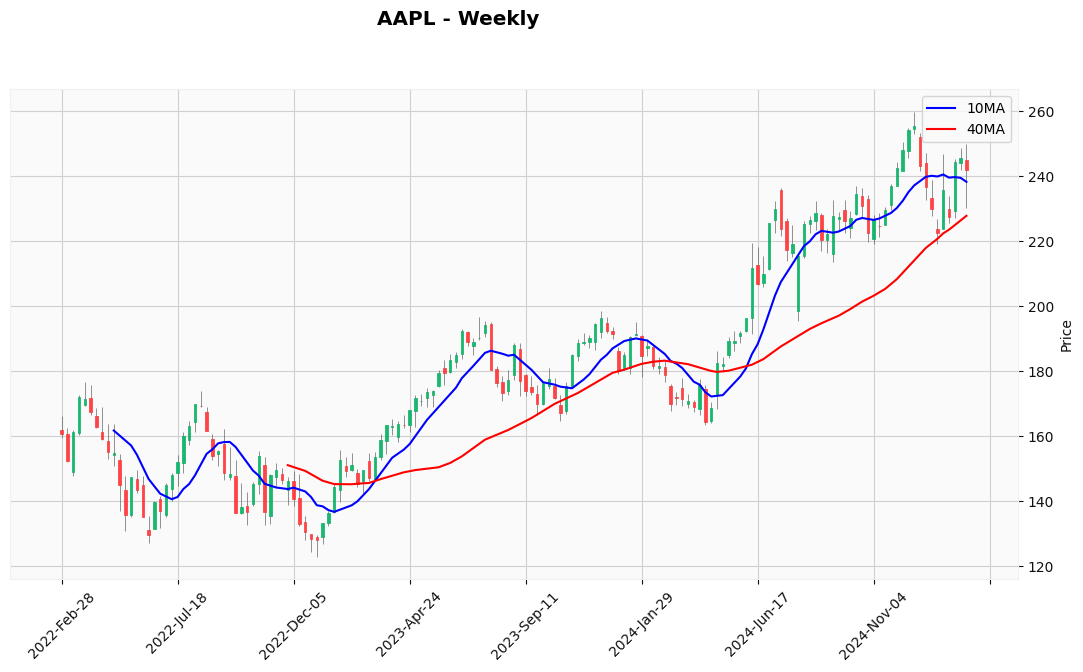

In [10]:
# grab the sub-dataframe for the ticker
df = df_weekly.xs(ticker)

# construct additional plots for the MAs
addt_plots = [
    mpf.make_addplot(df["10MA"], color="blue", width=1.5, label="10MA"),
    mpf.make_addplot(df["40MA"], color="red", width=1.5, label="40MA"),
]

# plot the daily OHLCV and MAs
mpf.plot(
    df,
    type="candle",
    style="yahoo",
    addplot=addt_plots,
    figsize=(14, 7),
    title=f"{ticker} - Weekly"
)

## Compututing monthly 10 moving average

In [11]:
# fetch monthly market data for the ticker
df_monthly = fetch_ohlcv_history(
    ticker=ticker,
    start_date=end_date - timedelta(days=365 * 5),
    end_date=end_date,
    interval="1mo"
)
df_monthly.tail()

Price                    Open        High         Low       Close      Volume
Symbol Date                                                                  
AAPL   2024-10-01  229.015968  236.968466  220.843951  225.413895   930736000
       2024-11-01  220.484735  237.287749  219.227507  236.808807   891640600
       2024-12-01  237.009422  259.814351  236.899542  250.144974   977916100
       2025-01-01  248.656607  248.826433  219.139072  235.740814  1200291700
       2025-02-01  229.737410  249.725428  225.452114  241.574387   862235100

In [12]:
# compute the monthly 10MA
df_monthly["10MA"] = df_monthly.groupby(level="Symbol")["Close"].transform(
    lambda x: x.rolling(window=10).mean()
)
df_monthly.tail()

Price                    Open        High         Low       Close      Volume  \
Symbol Date                                                                     
AAPL   2024-10-01  229.015968  236.968466  220.843951  225.413895   930736000   
       2024-11-01  220.484735  237.287749  219.227507  236.808807   891640600   
       2024-12-01  237.009422  259.814351  236.899542  250.144974   977916100   
       2025-01-01  248.656607  248.826433  219.139072  235.740814  1200291700   
       2025-02-01  229.737410  249.725428  225.452114  241.574387   862235100   

Price                    10MA  
Symbol Date                    
AAPL   2024-10-01  201.190659  
       2024-11-01  206.541591  
       2024-12-01  213.588960  
       2025-01-01  220.095631  
       2025-02-01  227.300121

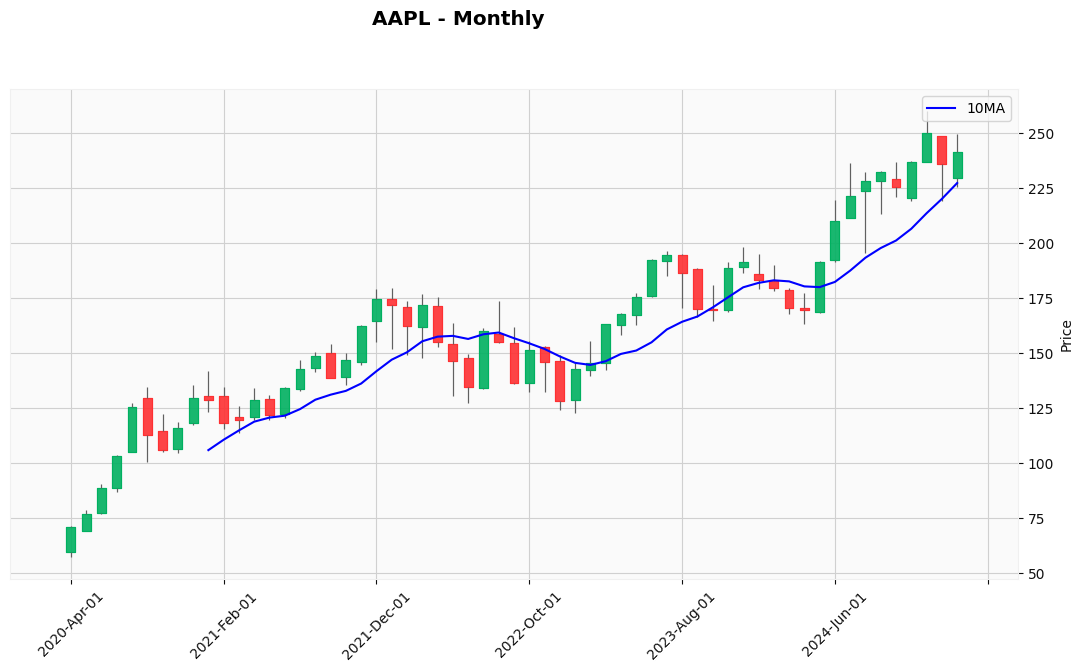

In [13]:
# grab the sub-dataframe for the ticker
df = df_monthly.xs(ticker)

# construct additional plots for the MAs
addt_plots = [
    mpf.make_addplot(df["10MA"], color="blue", width=1.5, label="10MA"),
]

# plot the daily OHLCV and MAs
mpf.plot(
    df,
    type="candle",
    style="yahoo",
    addplot=addt_plots,
    figsize=(14, 7),
    title=f"{ticker} - Monthly"
)